In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import yfinance as yf


In [82]:
from matplotlib import rc
rc('font', family='MalgunGothic')


In [84]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
from datetime import datetime

In [16]:
stock_price = yf.download({'005930.KS','^KS11'}, '2019-01-01', '2022-01-01', period='1d')
stock_price

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
               005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                     
2019-01-02  34482.312500  2010.000000   38750.0  2010.000000   39400.0   
2019-01-03  33458.964844  1993.699951   37600.0  1993.699951   38550.0   
2019-01-04  33325.488281  2010.250000   37450.0  2010.250000   37600.0   
2019-01-07  34482.312500  2037.099976   38750.0  2037.099976   38900.0   
2019-01-08  33903.898438  2025.270020   38100.0  2025.270020   39200.0   
...                  ...          ...       ...          ...       ...   
2021-12-24  78211.703125  3012.429932   80500.0  3012.429932   80800.0   
2021-12-27  77920.234375  2999.550049   80200.0  2999.550049   80600.0   
2021-12-28  78017.390625  3020.239990   80300.0  3020.239990   80400.0   
2021-12-29  76905.757812  2993.290039   78800.0  2993.290039   80200.0   
2021-12-30  76417.781250  2977.649902   78300.0  2977.649902   79500.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2019-01-02  2053.449951   38550.0  2004.270020   39400.0  2050.550049   
2019-01-03  2014.719971   37450.0  1991.650024   38300.0  2011.810059   
2019-01-04  2011.560059   36850.0  1984.530029   37450.0  1992.400024   
2019-01-07  2048.060059   37800.0  2030.900024   38000.0  2034.239990   
2019-01-08  2042.699951   37950.0  2023.589966   38000.0  2038.680054   
...                 ...       ...          ...       ...          ...   
2021-12-24  3025.770020   80200.0  3009.479980   80200.0  3009.479980   
2021-12-27  3017.310059   79800.0  2999.300049   80600.0  3013.939941   
2021-12-28  3020.290039   79700.0  2991.550049   80200.0  3006.770020   
2021-12-29  3007.719971   78500.0  2988.669922   80200.0  3002.899902   
2021-12-30  3005.360107   78100.0  2975.739990   78900.0  2999.750000   

              Volume          
           005930.KS   ^KS11  
Date                          
2019-01-02   7847664  326400  
2019-01-03  12471493  428000  
2019-01-04  14108958  409000  
2019-01-07  12748997  440200  
2019-01-08  12756554  397800  
...              ...     ...  
2021-12-24  12086380  537500  
2021-12-27  10783368  475000  
2021-12-28  18226325  607000  
2021-12-29  19794795  545800  
2021-12-30  14236700  460600  

[742 rows x 12 columns]

In [17]:
stock_price.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-24', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=742, freq=None)

In [18]:
stock_price['STD - YM'] = list(map(lambda x : datetime.strftime(x, '%Y-%m'), stock_price.index))
stock_price.head(1)

Adj Close             Close              High               \
             005930.KS   ^KS11 005930.KS   ^KS11 005930.KS        ^KS11   
Date                                                                      
2019-01-02  34482.3125  2010.0   38750.0  2010.0   39400.0  2053.449951   

                 Low                  Open                 Volume          \
           005930.KS       ^KS11 005930.KS        ^KS11 005930.KS   ^KS11   
Date                                                                        
2019-01-02   38550.0  2004.27002   39400.0  2050.550049   7847664  326400   

           STD - YM  
                     
Date                 
2019-01-02  2019-01

In [19]:
stock_price.loc[stock_price['STD - YM'] != stock_price.shift(-1)['STD - YM']]

Adj Close                  Close                   High  \
               005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                     
2019-01-31  41067.320312  2204.850098   46150.0  2204.850098   47050.0   
2019-02-28  40132.968750  2195.439941   45100.0  2195.439941   46500.0   
2019-03-29  40045.113281  2140.669922   44650.0  2140.669922   44900.0   
2019-04-30  41121.355469  2203.590088   45850.0  2203.590088   46300.0   
2019-05-31  38116.851562  2041.739990   42500.0  2041.739990   42800.0   
2019-06-28  42481.820312  2130.620117   47000.0  2130.620117   47000.0   
2019-07-31  40990.437500  2024.550049   45350.0  2024.550049   46600.0   
2019-08-30  39770.218750  1967.790039   44000.0  1967.790039   44300.0   
2019-09-30  44656.050781  2063.050049   49050.0  2063.050049   49250.0   
2019-10-31  45885.121094  2083.479980   50400.0  2083.479980   51400.0   
2019-11-29  45794.082031  2087.959961   50300.0  2087.959961   51400.0   
2019-12-30  51128.093750  2197.669922   55800.0  2197.669922   56600.0   
2020-01-31  51677.855469  2119.010010   56400.0  2119.010010   58400.0   
2020-02-28  49662.050781  1987.010010   54200.0  1987.010010   55500.0   
2020-03-31  44075.113281  1754.640015   47750.0  1754.640015   48500.0   
2020-04-29  46151.953125  1947.560059   50000.0  1947.560059   50500.0   
2020-05-29  46798.078125  2029.599976   50700.0  2029.599976   50700.0   
2020-06-30  49062.316406  2108.330078   52800.0  2108.330078   53900.0   
2020-07-31  53801.296875  2249.370117   57900.0  2249.370117   59600.0   
2020-08-31  50177.375000  2326.169922   54000.0  2326.169922   56100.0   
2020-09-29  54412.738281  2327.889893   58200.0  2327.889893   59000.0   
2020-10-30  52916.851562  2267.149902   56600.0  2267.149902   58000.0   
2020-11-30  62359.609375  2591.340088   66700.0  2591.340088   68600.0   
2020-12-30  77634.921875  2873.469971   81000.0  2873.469971   81300.0   
2021-01-29  78593.375000  2976.209961   82000.0  2976.209961   85000.0   
2021-02-26  79072.609375  3012.949951   82500.0  3012.949951   83400.0   
2021-03-31  78364.992188  3061.419922   81400.0  3061.419922   82700.0   
2021-04-30  78461.265625  3147.860107   81500.0  3147.860107   82100.0   
2021-05-31  77498.531250  3203.919922   80500.0  3203.919922   80600.0   
2021-06-30  78035.054688  3296.679932   80700.0  3296.679932   81400.0   
2021-07-30  75907.703125  3202.320068   78500.0  3202.320068   78900.0   
2021-08-31  74167.148438  3199.270020   76700.0  3199.270020   76700.0   
2021-09-30  71993.632812  3068.820068   74100.0  3068.820068   74800.0   
2021-10-29  67815.867188  2970.679932   69800.0  2970.679932   71600.0   
2021-11-30  69273.218750  2839.010010   71300.0  2839.010010   73900.0   
2021-12-30  76417.781250  2977.649902   78300.0  2977.649902   79500.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2019-01-31  2222.879883   46150.0  2201.219971   46650.0  2222.879883   
2019-02-28  2233.929932   45100.0  2195.439941   46400.0  2231.580078   
2019-03-29  2143.300049   44200.0  2124.070068   44500.0  2138.449951   
2019-04-30  2215.770020   45350.0  2186.330078   46000.0  2213.429932   
2019-05-31  2048.899902   42150.0  2022.969971   42600.0  2029.030029   
2019-06-28  2139.239990   46700.0  2123.969971   47000.0  2135.060059   
2019-07-31  2041.160034   45000.0  2010.949951   46200.0  2036.459961   
2019-08-30  1971.209961   43750.0  1951.300049   43750.0  1951.660034   
2019-09-30  2064.989990   47900.0  2042.010010   48050.0  2045.770020   
2019-10-31  2103.709961   50300.0  2083.479980   51000.0  2089.219971   
2019-11-29  2125.530029   50200.0  2085.100098   51200.0  2125.530029   
2019-12-30  2208.040039   55700.0  2195.649902   56200.0  2202.620117   
2020-01-31  2167.229980   56400.0

In [20]:
month_list = pd.DataFrame()

_list = stock_price['STD - YM'].unique()

for i in _list :
    last_df = stock_price.loc[stock_price['STD - YM'] ==  i].tail(1)
    month_list = pd.concat([month_list, last_df])

month_list

Adj Close                  Close                   High  \
               005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                     
2019-01-31  41067.320312  2204.850098   46150.0  2204.850098   47050.0   
2019-02-28  40132.968750  2195.439941   45100.0  2195.439941   46500.0   
2019-03-29  40045.113281  2140.669922   44650.0  2140.669922   44900.0   
2019-04-30  41121.355469  2203.590088   45850.0  2203.590088   46300.0   
2019-05-31  38116.851562  2041.739990   42500.0  2041.739990   42800.0   
2019-06-28  42481.820312  2130.620117   47000.0  2130.620117   47000.0   
2019-07-31  40990.437500  2024.550049   45350.0  2024.550049   46600.0   
2019-08-30  39770.218750  1967.790039   44000.0  1967.790039   44300.0   
2019-09-30  44656.050781  2063.050049   49050.0  2063.050049   49250.0   
2019-10-31  45885.121094  2083.479980   50400.0  2083.479980   51400.0   
2019-11-29  45794.082031  2087.959961   50300.0  2087.959961   51400.0   
2019-12-30  51128.093750  2197.669922   55800.0  2197.669922   56600.0   
2020-01-31  51677.855469  2119.010010   56400.0  2119.010010   58400.0   
2020-02-28  49662.050781  1987.010010   54200.0  1987.010010   55500.0   
2020-03-31  44075.113281  1754.640015   47750.0  1754.640015   48500.0   
2020-04-29  46151.953125  1947.560059   50000.0  1947.560059   50500.0   
2020-05-29  46798.078125  2029.599976   50700.0  2029.599976   50700.0   
2020-06-30  49062.316406  2108.330078   52800.0  2108.330078   53900.0   
2020-07-31  53801.296875  2249.370117   57900.0  2249.370117   59600.0   
2020-08-31  50177.375000  2326.169922   54000.0  2326.169922   56100.0   
2020-09-29  54412.738281  2327.889893   58200.0  2327.889893   59000.0   
2020-10-30  52916.851562  2267.149902   56600.0  2267.149902   58000.0   
2020-11-30  62359.609375  2591.340088   66700.0  2591.340088   68600.0   
2020-12-30  77634.921875  2873.469971   81000.0  2873.469971   81300.0   
2021-01-29  78593.375000  2976.209961   82000.0  2976.209961   85000.0   
2021-02-26  79072.609375  3012.949951   82500.0  3012.949951   83400.0   
2021-03-31  78364.992188  3061.419922   81400.0  3061.419922   82700.0   
2021-04-30  78461.265625  3147.860107   81500.0  3147.860107   82100.0   
2021-05-31  77498.531250  3203.919922   80500.0  3203.919922   80600.0   
2021-06-30  78035.054688  3296.679932   80700.0  3296.679932   81400.0   
2021-07-30  75907.703125  3202.320068   78500.0  3202.320068   78900.0   
2021-08-31  74167.148438  3199.270020   76700.0  3199.270020   76700.0   
2021-09-30  71993.632812  3068.820068   74100.0  3068.820068   74800.0   
2021-10-29  67815.867188  2970.679932   69800.0  2970.679932   71600.0   
2021-11-30  69273.218750  2839.010010   71300.0  2839.010010   73900.0   
2021-12-30  76417.781250  2977.649902   78300.0  2977.649902   79500.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2019-01-31  2222.879883   46150.0  2201.219971   46650.0  2222.879883   
2019-02-28  2233.929932   45100.0  2195.439941   46400.0  2231.580078   
2019-03-29  2143.300049   44200.0  2124.070068   44500.0  2138.449951   
2019-04-30  2215.770020   45350.0  2186.330078   46000.0  2213.429932   
2019-05-31  2048.899902   42150.0  2022.969971   42600.0  2029.030029   
2019-06-28  2139.239990   46700.0  2123.969971   47000.0  2135.060059   
2019-07-31  2041.160034   45000.0  2010.949951   46200.0  2036.459961   
2019-08-30  1971.209961   43750.0  1951.300049   43750.0  1951.660034   
2019-09-30  2064.989990   47900.0  2042.010010   48050.0  2045.770020   
2019-10-31  2103.709961   50300.0  2083.479980   51000.0  2089.219971   
2019-11-29  2125.530029   50200.0  2085.100098   51200.0  2125.530029   
2019-12-30  2208.040039   55700.0  2195.649902   56200.0  2202.620117   
2020-01-31  2167.229980   56400.0

In [21]:
month_list['BF_1M_SS'] = month_list.shift(1)['Adj Close']['005930.KS'].fillna(0)
month_list.head()

Adj Close                  Close                   High  \
               005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                     
2019-01-31  41067.320312  2204.850098   46150.0  2204.850098   47050.0   
2019-02-28  40132.968750  2195.439941   45100.0  2195.439941   46500.0   
2019-03-29  40045.113281  2140.669922   44650.0  2140.669922   44900.0   
2019-04-30  41121.355469  2203.590088   45850.0  2203.590088   46300.0   
2019-05-31  38116.851562  2041.739990   42500.0  2041.739990   42800.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2019-01-31  2222.879883   46150.0  2201.219971   46650.0  2222.879883   
2019-02-28  2233.929932   45100.0  2195.439941   46400.0  2231.580078   
2019-03-29  2143.300049   44200.0  2124.070068   44500.0  2138.449951   
2019-04-30  2215.770020   45350.0  2186.330078   46000.0  2213.429932   
2019-05-31  2048.899902   42150.0  2022.969971   42600.0  2029.030029   

              Volume         STD - YM      BF_1M_SS  
           005930.KS   ^KS11                         
Date                                                 
2019-01-31  21621145  545200  2019-01      0.000000  
2019-02-28  23569321  510000  2019-02  41067.320312  
2019-03-29  11491713  364600  2019-03  40132.968750  
2019-04-30  11121273  381400  2019-04  40045.113281  
2019-05-31  11365999  439200  2019-05  41121.355469

In [22]:
month_list['BF_1M_KP'] = month_list.shift(1)['Adj Close']['^KS11'].fillna(0)
month_list.head()

Adj Close                  Close                   High  \
               005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                     
2019-01-31  41067.320312  2204.850098   46150.0  2204.850098   47050.0   
2019-02-28  40132.968750  2195.439941   45100.0  2195.439941   46500.0   
2019-03-29  40045.113281  2140.669922   44650.0  2140.669922   44900.0   
2019-04-30  41121.355469  2203.590088   45850.0  2203.590088   46300.0   
2019-05-31  38116.851562  2041.739990   42500.0  2041.739990   42800.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2019-01-31  2222.879883   46150.0  2201.219971   46650.0  2222.879883   
2019-02-28  2233.929932   45100.0  2195.439941   46400.0  2231.580078   
2019-03-29  2143.300049   44200.0  2124.070068   44500.0  2138.449951   
2019-04-30  2215.770020   45350.0  2186.330078   46000.0  2213.429932   
2019-05-31  2048.899902   42150.0  2022.969971   42600.0  2029.030029   

              Volume         STD - YM      BF_1M_SS     BF_1M_KP  
           005930.KS   ^KS11                                      
Date                                                              
2019-01-31  21621145  545200  2019-01      0.000000     0.000000  
2019-02-28  23569321  510000  2019-02  41067.320312  2204.850098  
2019-03-29  11491713  364600  2019-03  40132.968750  2195.439941  
2019-04-30  11121273  381400  2019-04  40045.113281  2140.669922  
2019-05-31  11365999  439200  2019-05  41121.355469  2203.590088

In [47]:
month_list.head(3)

Adj Close                  Close                   High  \
               005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                     
2019-01-31  41067.320312  2204.850098   46150.0  2204.850098   47050.0   
2019-02-28  40132.968750  2195.439941   45100.0  2195.439941   46500.0   
2019-03-29  40045.113281  2140.669922   44650.0  2140.669922   44900.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2019-01-31  2222.879883   46150.0  2201.219971   46650.0  2222.879883   
2019-02-28  2233.929932   45100.0  2195.439941   46400.0  2231.580078   
2019-03-29  2143.300049   44200.0  2124.070068   44500.0  2138.449951   

              Volume         STD - YM      BF_1M_SS     BF_1M_KP return_SS  
           005930.KS   ^KS11                                                
Date                                                                        
2019-01-31  21621145  545200  2019-01      0.000000     0.000000         0  
2019-02-28  23569321  510000  2019-02  41067.320312  2204.850098         0  
2019-03-29  11491713  364600  2019-03  40132.968750  2195.439941         0

In [32]:
len(month_list.index)

36

In [49]:
month_list.drop(['return_SS'], axis= 1, inplace= True)

In [50]:
month_list.head(3)

Adj Close                  Close                   High  \
               005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                     
2019-01-31  41067.320312  2204.850098   46150.0  2204.850098   47050.0   
2019-02-28  40132.968750  2195.439941   45100.0  2195.439941   46500.0   
2019-03-29  40045.113281  2140.669922   44650.0  2140.669922   44900.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2019-01-31  2222.879883   46150.0  2201.219971   46650.0  2222.879883   
2019-02-28  2233.929932   45100.0  2195.439941   46400.0  2231.580078   
2019-03-29  2143.300049   44200.0  2124.070068   44500.0  2138.449951   

              Volume         STD - YM      BF_1M_SS     BF_1M_KP  
           005930.KS   ^KS11                                      
Date                                                              
2019-01-31  21621145  545200  2019-01      0.000000     0.000000  
2019-02-28  23569321  510000  2019-02  41067.320312  2204.850098  
2019-03-29  11491713  364600  2019-03  40132.968750  2195.439941

In [54]:
month_list['return_SS'] = month_list['Adj Close']['005930.KS'] / month_list['BF_1M_SS'] - 1

In [56]:
month_list['return_KP'] = month_list['Adj Close']['^KS11'] / month_list['BF_1M_KP'] - 1

In [69]:
month_list['return_SS'] = month_list['return_SS'].replace(np.inf, 0)
month_list['return_KP'] = month_list['return_KP'].replace(np.inf, 0)


In [75]:
_df = month_list.loc[:, ['Adj Close', 'return_SS', 'return_KP']]

In [78]:
_df.tail()

Adj Close              return_SS return_KP
               005930.KS        ^KS11                    
Date                                                     
2021-08-31  74167.148438  3199.270020 -0.022930 -0.000952
2021-09-30  71993.632812  3068.820068 -0.029306 -0.040775
2021-10-29  67815.867188  2970.679932 -0.058030 -0.031980
2021-11-30  69273.218750  2839.010010  0.021490 -0.044323
2021-12-30  76417.781250  2977.649902  0.103136  0.048834

C:\Users\zino0\AppData\Local\Temp\ipykernel_23900\3980868016.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(_df['return_SS'])
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


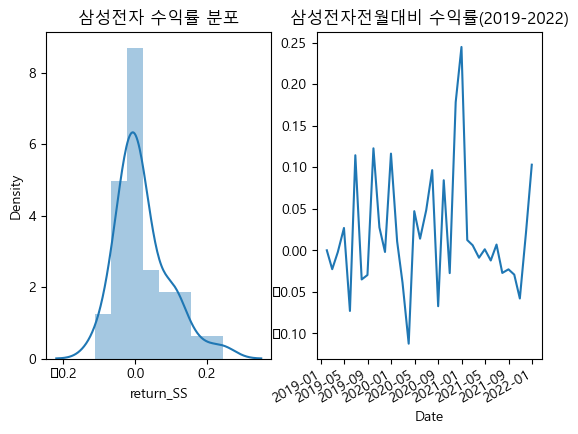

In [88]:
plt.subplot(1,2,1)
sns.distplot(_df['return_SS'])
plt.title('삼성전자 수익률 분포')
plt.subplot(1,2,2)
_df['return_SS'].plot(kind= 'line')
plt.title('삼성전자전월대비 수익률(2019-2022)')
plt.show()

In [90]:
# 정규성
# 정규성 검정 방법 중 하나로 Shapiro Wilk test
# 
from scipy.stats import shapiro

for i in ['^KS11', '005930.KS'] : 
    stats, pval = shapiro(_df['Adj Close'][i])

    if pval < .05 :
        print(f"{i}의 경우, p값이 {pval*100: .5f}% 이므로 정규성을 충족한다는 귀무가설을 5%의 유의수준으로 Reject ")
    else : 
        print(f"{i}의 경우, {pval*100 : .3f}%이므로 정규성을 충족한다는 Null Hypothersis를 5%의 유의수준으로 Do Not Reject")

^KS11의 경우, p값이  0.02745% 이므로 정규성을 충족한다는 귀무가설을 5%의 유의수준으로 Reject 
005930.KS의 경우, p값이  0.01595% 이므로 정규성을 충족한다는 귀무가설을 5%의 유의수준으로 Reject 


### Result
- 2019-2022 시기는 코로나 시기로 상당히 특이한 케이스 
- 정규성을 띄지 않는다는 대립가설을 선택 가능
- 즉, 코로나 시기는 통계적으로 유의할 정도로 정규성을 띄지 않는다고 판단 가능 

In [10]:
# 전월 대비 주가 수익률로 공모전에 활용 가능 